In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
# load ground Ground Truth 
ground_1 = pd.read_csv( 'neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
ground_1 = ground_1.set_index('pID')
# show part of Data Frame
ground_1.head()

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
pID,,,,,,,,
11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


Text(0, 0.5, 'Typing Speed (WPM)')

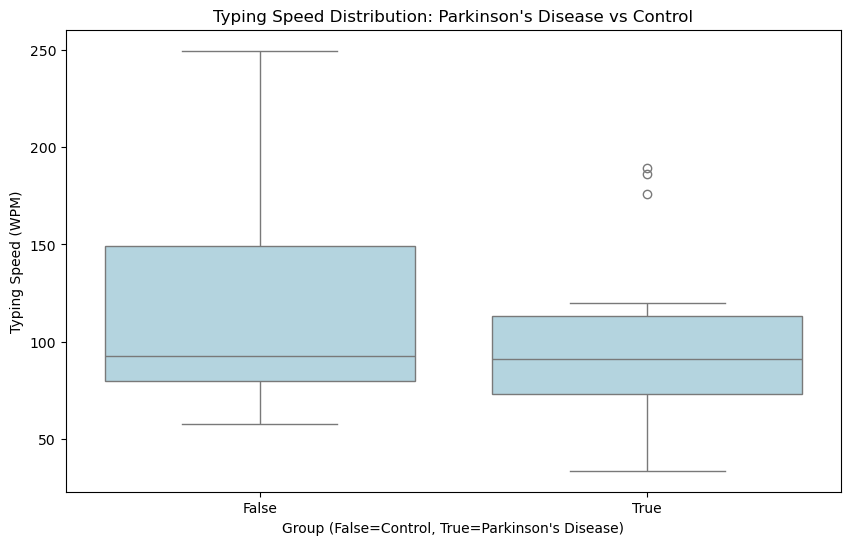

In [5]:
# Visualization 1: Box plot comparing typing speeds between PD and Control groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='gt', y='typingSpeed', data=ground_1, color = 'lightblue')
plt.title('Typing Speed Distribution: Parkinson\'s Disease vs Control')
plt.xlabel('Group (False=Control, True=Parkinson\'s Disease)')
plt.ylabel('Typing Speed (WPM)')

In [30]:
from collections import defaultdict

import sys
sys.path.append('nqDataLoader.py')
import nqDataLoader

nq = nqDataLoader.NqDataLoader()
# Initialize dictionaries to store hold data
hold_data = {
    'pd': defaultdict(list),
    'control': defaultdict(list)
}

# Process data for each subject
for idx, row in ground_1.iterrows():
    # Load both sessions for each subject
    for file in [row['file_1'], row['file_2']]:
        group = 'pd' if row['gt'] else 'control'
        keys, hold_times, press_times, release_times = nqDataLoader.getDataFiltHelper(f'neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD/data_MIT-CS1PD/{file}')
        hold_series = pd.Series(hold_times, index=keys)

        # Bucket hold times for each key
        for key, hold_time in hold_series.items():
            clean_key = key.lower().strip('"').replace('space', ' ')
            if len(clean_key) == 1 or clean_key == ' ': 
                hold_data[group][clean_key].append(hold_time)

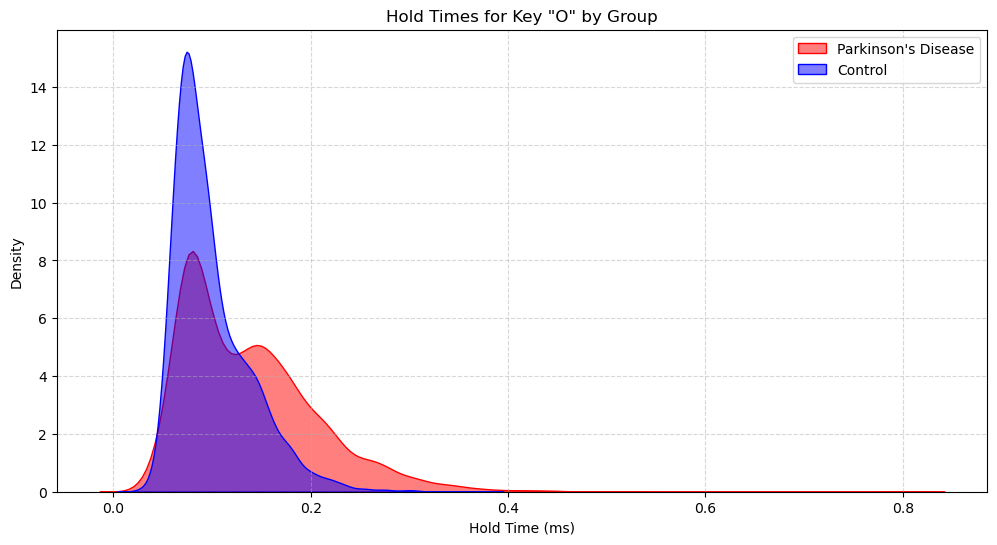

In [31]:
# Hold times for the 'O' key
plt.figure(figsize=(12, 6))
sns.kdeplot(
    hold_data['pd']['o'], 
    label='Parkinson\'s Disease', 
    color='red', 
    fill=True, 
    alpha=0.5
)
sns.kdeplot(
    hold_data['control']['o'], 
    label='Control', 
    color='blue', 
    fill=True, 
    alpha=0.5
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Hold Times for Key "O" by Group')
plt.xlabel('Hold Time (ms)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [33]:
with open('interactive-keyboard-viz/src/data/hold_data.json', 'w') as f:
    json.dump(hold_data, f, indent=4)

In [34]:
# Define keyboard layout
keyboard_layout = [
    'qwertyuiop',
    'asdfghjkl',
    'zxcvbnm'
]